### Тест

Задача №1

p1 = 0.15 q1 = 0.85
p2 = 0.8 q2 = 0.2
p3 = 0.1 q3 = 0.9

Pb = p1*p2*q3 + p1*q2*p3 + q1*q2*p3 - вероятность фиксации дефекта
Pd = p1*p2*q3 + p1*q2*p3 - вероятность дефекта

По формуле Байеса:
P = Pd/Pb = 0.874

Задача №2

In [85]:
# IMPORTS
import random
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import norm

In [53]:
def create_card():
    cards = []
    for i in range(4):
        cards.append('Ace')
    for i in range(48):
        cards.append('other')
    random.shuffle(cards)
    return cards

In [54]:
distr = []
for i in range(1000):
    cards = create_card()
    distr.append(cards.index('Ace'))
c_distr = pd.DataFrame.from_dict(Counter(distr), orient='index').sort_index().astype(int)

<AxesSubplot: >

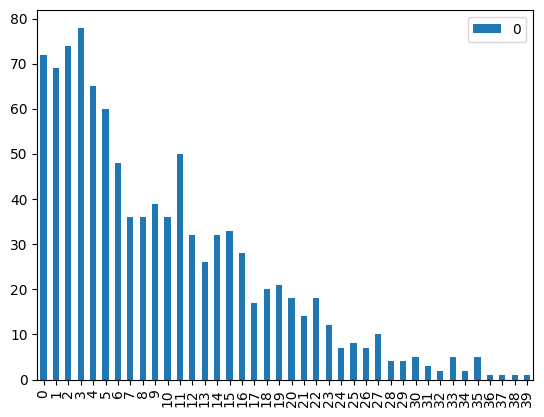

In [63]:
c_distr.plot(kind='bar')

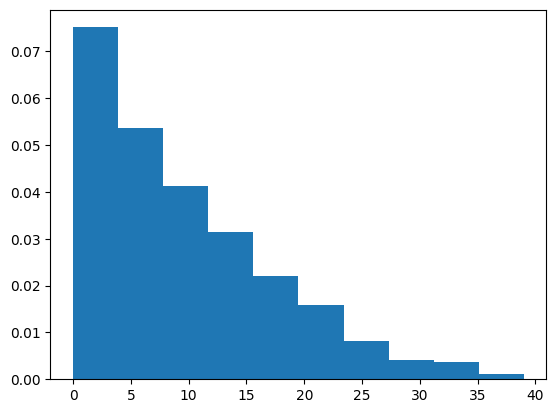

In [89]:
plt.hist(distr, density=True)
plt.show()

In [84]:
print(f'Дисперсия {np.var(distr)}')
print(f'Среднее {np.mean(distr)}')

Дисперсия 65.734
Среднее 9.5


In [103]:
print(f'Фиксированная вероятность (квантиль вероятности 50%) = {int(np.quantile(distr, 0.5))}') # То-есть с вероятностью 50% туз будет в первых 7 картах

Фиксированная вероятность (квантиль вероятности 50%) = 7


Задача №3

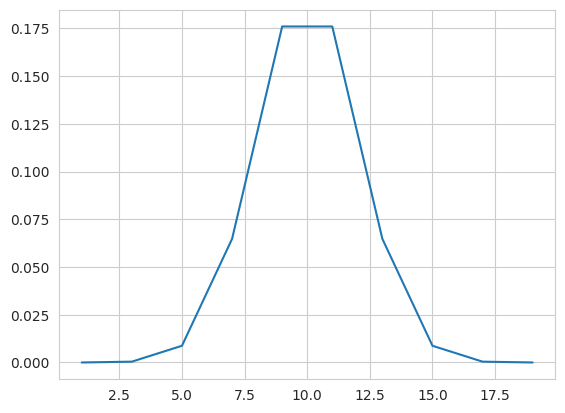

In [116]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

# Визуализация
data = np.arange(1, 20, 2)
pdf = norm.pdf(data , loc = 10 , scale = 2)


plt.plot(data, pdf)
plt.show()

In [118]:
print(f'Вероятность нахождения больше 12.5 = {1 - norm(loc=10, scale=2).cdf(12.5)}')

Вероятность нахождения больше 12.5 = 0.10564977366685535


Задача №4

Определитель равен произведению элементов на главной диагонали.
Следовательно 1*(1-x)*(2-x)...(n-x) = 0
(1-x)*(2-x)...(n-x) = 0
X Может принадлежать любому целому числу от 1 до n

Задача №5

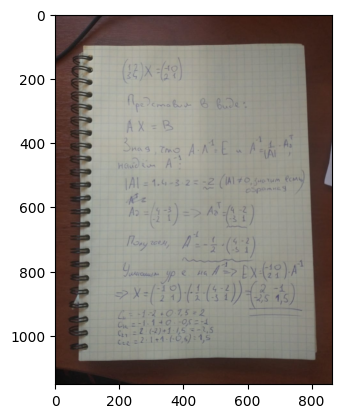

In [107]:
image = plt.imread('pigs/img_5.jpeg')
plt.imshow(image)
plt.show()

Задача №6

Уравнение окружности:
(x - x0)^2 + (y - y0)^2 = R^2

Пусть точка касания (x1, y1)
Тогда уравнение касательной:
(x1 - x0)(x - x0) + (y1 - y0)(y - y0) = R^2

Известно, что угол к оси равен 45, следовательно x1 = y1 + k
k = x0
x1 = (R^2 - y0^2)/(x0 - y0)

Задача №7

--------

Задача №8

Плоскость задается 3-мя точками у нас их 4.
Уравнение плоскости: A1x+А2y+А3z+А4=0
А1(1, 0, 2)
А2(2, -1, 0)
А3(0, 0, 0)
А4(1, -1, 0)

Составим 3 вектора:
А1А2 = (1, -1, -2)
А1А3 = (-1, 0, -2)
А1А4 = (0, -1, -2)

Определитель равен 2, следовательно поверхность не является плоской

Для получение плоскости следует отбросить точку А1 следует отбросить в первую очередь.


Задача №9

-----

Задача №10

H0 - Дефектность и легированность сталей зависимы
H1 - Дефектность и легированность сталей независимы
уровень значимости 0.1

In [122]:
from scipy.stats import pearsonr

In [123]:
defect = [5, 2, 1, 7, 8, 4, 6, 3]
legir = [4, 3, 2, 1, 7, 6, 5, 8]

In [125]:
stat, p = pearsonr(defect, legir)
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

if p < 0.1:
    print('Отклонить гипотезу о зависимости')
else:
    print('Принять гипотезу о зависимости')

Statistics=0.167, p-value=0.693
Принять гипотезу о зависимости


На уровне значимости 0.1 не отвергаем гипотезу H0

Задача №11

In [175]:
# IMPORTS
import pandas as pd
import numpy as np

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import plotly.express as px

In [161]:
data = pd.read_csv('Users_behavior.csv')

In [162]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [164]:
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [176]:
fig = px.pie(data, names=data['is_ultra'], title='Классы таргета')
fig.show()

Поделим данные на выборки:

In [166]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra']

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=1, stratify=target)

In [167]:
parametrs_lgb = { 'learning_rate': np.arange(0.25, 0.3, 0.005),
                  'colsample_bytree': np.arange(0, 0.02, 0.005),
                  'alpha': np.arange(0, 0.02, 0.005),
                 'max_depth': range (6, 12, 2),
                'n_estimators': range (50, 100, 10)}
model_lgb = lgb.LGBMClassifier(random_state=281122)

In [168]:
%%time
grid_lgb = GridSearchCV(model_lgb, parametrs_lgb, scoring=['roc_auc', 'f1', 'accuracy'], n_jobs=-1, cv=5, verbose=1, refit='roc_auc')
grid_lgb.fit(features_train, target_train)
grid_lgb_list = grid_lgb.best_estimator_
grid_lgb_score = grid_lgb.best_score_

Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-package/compile/src/io/config_auto.cpp, line 372 .

[LightGBM] [Fatal] Check failed: (feature_fraction) > (0.0) at /__w/1/s/python-pack

CPU times: user 20.5 s, sys: 853 ms, total: 21.3 s
Wall time: 1min 19s


In [169]:
print(f'Оценка на валидации F1 = {grid_lgb.cv_results_["mean_test_f1"][grid_lgb.best_index_]}')
print(f'Оценка на валидации accuracy = {grid_lgb.cv_results_["mean_test_accuracy"][grid_lgb.best_index_]}')
print(f'Оценка на валидации ROC AUC = {grid_lgb_score}')

Оценка на валидации F1 = 0.5871295710458053
Оценка на валидации accuracy = 0.7983402489626557
Оценка на валидации ROC AUC = 0.8118680468421605


In [172]:
probabilities_valid_rfor = grid_lgb_list.predict_proba(features_train)
probabilities_one_valid_rfor = probabilities_valid_rfor[:, 1]
predicted_valid_rfor = grid_lgb_list.predict(features_train)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(target_train, probabilities_one_valid_rfor)

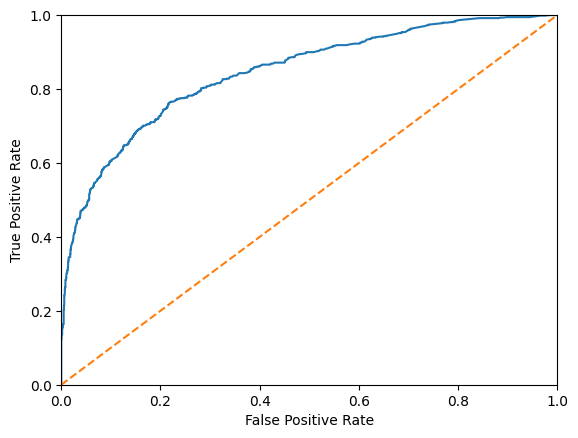

In [173]:
plt.figure()
plt.plot(fpr_rf, tpr_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

Оценка на тестовой выборке:

In [174]:
print(f'Оценка ROC AUC - {roc_auc_score(target_test, grid_lgb_list.predict_proba(features_test)[:,1])}')
print(f'Оценка accuracy - {accuracy_score(target_test, grid_lgb_list.predict(features_test))}')
print(f'Оценка f1 - {f1_score(target_test, grid_lgb_list.predict(features_test))}')

Оценка ROC AUC - 0.79691552291867
Оценка accuracy - 0.7960199004975125
Оценка f1 - 0.6


Задача №12

In [22]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import pytesseract
from collections import Counter

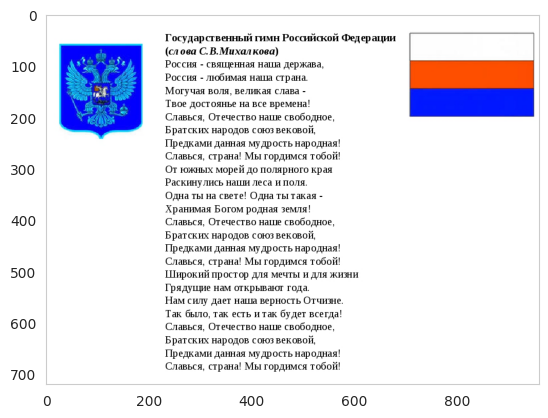

In [127]:
def show_img_text(pach):
    img = cv2.imread(pach)

    plt.imshow(img)
    plt.grid(False)
    plt.show()

    custom_config = r'--oem 1 --psm 4'
    text = pytesseract.image_to_string(img, lang='rus', config=custom_config)
    return text

a = show_img_text('Hymn_text.jpg')

Очистим текст:

In [15]:
a = a.replace('\n', ' ').replace('\x0c', '').replace(' ', '').lower()
print(a)

государственныйгимнроссийскойфедерации(словас.в.михалкова)россия-священнаянашадержава,россия-любимаянашастрана.могучаяволя,великаяслава-твоедостояньенавсевремена!славься,отечествонашесвободное,братскихнародовсоюзвековой,предкамиданнаямудростьнародная!славься,страна!мыгордимсятобой!отюжныхморейдополярногокраяраскинулисьнашилесаиполя.однатынасвете!однатытакая-хранимаябогомроднаяземля!славься,отечествонашесвободное,братскихнародовсоюзвековой,предкамиданнаямудростьнародная!славься,страна!мыгордимсятобой!широкийпростордлямечтыидляжизнигрядущиенамоткрываютгода.намсилудаетнашаверностьотчизне.такбыло,такестьитакбудетвсегда!славься,отечествонашесвободное,братскихнародовсоюзвековой,предкамиданнаямудростьнародная!славься,страна!мыгордимсятобой!


Словарь с количеством вхождения символов

In [16]:
b = list(''.join(set(a)))
result = {}
for i in range(len(b)):
    result[b[i]] = Counter(a)[b[i]]

Сделаю таблицу:

In [20]:
result_table = pd.DataFrame.from_dict(result, orient='index').sort_values(by=0, ascending=False)

In [21]:
result_table

,0
а,80
о,77
с,58
н,50
е,42
р,41
т,39
в,37
д,36
я,34


Статьи:
https://pytesseract.readthedocs.io/en/latest/